# Interpolation
* How to construct a function from discrete set of data points.
* Similar to least square fit, but goal is to find function that **exactly** matches given data points.

- __Introduction__
- __Polynomials__
- __Polynomial Interpolation__
- __Spline Interpolation__
- __Multivariate Interpolation__

In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import polynomial as P
from scipy import interpolate
from scipy import linalg

### Working with Polynomials
* __numpy.poly1d__ and __numpy.polynomial__ have large functional overlap, but incompatible. Use __numpy.polynomial__ for all new code.

In [3]:
# to create polynomial 1 + 2*x + 3*x^2
p1 = P.Polynomial([1,2,3])

# alternative create method by specifying roots
p2 = P.Polynomial.fromroots([-1, 1])

print(p1,"\n",p2)

poly([1. 2. 3.]) 
 poly([-1.  0.  1.])


In [4]:
# computing roots
print(p1.roots(),"\n",p2.roots())

[-0.33333333-0.47140452j -0.33333333+0.47140452j] 
 [-1.  1.]


* domain & window attributes - used to map input to another interval
* best use case: working with polynomials orthogonal to a scalar product

In [5]:
print(p1.coef,"\n",p1.domain,"\n",p1.window)

[1. 2. 3.] 
 [-1  1] 
 [-1  1]


In [6]:
# makes polynomial evaluation with arbitrary args rather easy.
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

* Instances of __Polynomial__ can be used for std math operations.

In [7]:
p1+p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [8]:
p2/5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.])

In [9]:
p1 = P.Polynomial.fromroots([1, 2, 3]); p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [10]:
p2 = P.Polynomial.fromroots([2]); p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [11]:
p3 = p1 // p2; p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [12]:
p3.roots()

array([1., 3.])

* Polynomial offers support for __Chebyshev__, __Legendre__, __Laguerre__ & __Hermite__ bases.

In [13]:
c1 = P.Chebyshev([1, 2, 3]); c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [14]:
c1.roots()

array([-0.76759188,  0.43425855])

In [15]:
c = P.Chebyshev.fromroots([-1, 1]); c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [16]:
l = P.Legendre.fromroots([-1, 1]); l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [17]:
c1(np.array([0.5, 1.5, 2.5]))

array([ 0.5, 14.5, 40.5])

In [18]:
l(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

### Polynomial interpolation

In [19]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [20]:
# to interpolate polynomial thru points above, we need a
# polynomial of 3rd degree (#datapoints -1).
deg = len(x) - 1
deg

3

In [21]:
# find Vandermonde matrix
A = P.polynomial.polyvander(x, deg)

In [22]:
# solve interpolation, returns coefficients vector
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [23]:
f1 = P.Polynomial(c)
f1(2.5)

4.1875

In [24]:
f1(2.5)

4.1875

In [25]:
# polynomial interpolation in another basis == change function
# name used to generate Vandermonde matrix
A = P.chebyshev.chebvander(x, deg)

In [26]:
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [27]:
f2 = P.Chebyshev(c)
f2(2.5)

4.1875

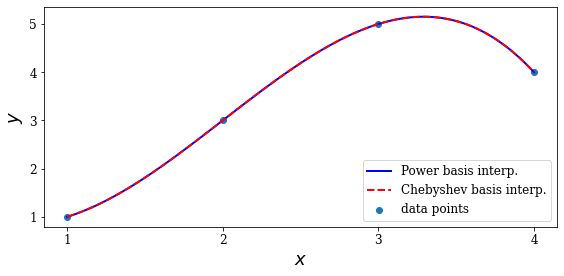

In [28]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig('ch7-polynomial-interpolation.pdf');

In [29]:
# better method: using generalized fit method
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [30]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [31]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

4659.738424140487

In [32]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))

1.8542033440472898

In [33]:
(2 * x - 5)/3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [34]:
f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)

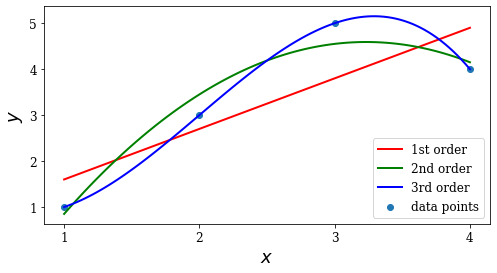

In [35]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'r', lw=2, label='1st order')
ax.plot(xx, f2(xx), 'g', lw=2, label='2nd order')
ax.plot(xx, f3(xx), 'b', lw=2, label='3rd order')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

### Runge problem
* When #data points increase, we need higher-order polynomials for exact interpolation == problematic. (Example: wide variation between specified datapoints. Runge's function == illustration.)

In [36]:
def runge(x):
    return 1/(1 + 25 * x**2)

In [37]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

In [38]:
xx = np.linspace(-1, 1, 250)

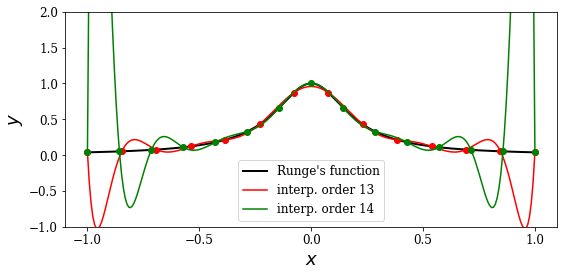

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig('ch7-polynomial-interpolation-runge.pdf');

### Spline interpolation
* Piecewise polynomial of degree k == spline if it continuously differentiable k-1 times.

In [40]:
x = np.linspace(-1, 1, 11)

In [41]:
y = runge(x)

In [42]:
f = interpolate.interp1d(x, y, kind=3)

In [43]:
xx = np.linspace(-1, 1, 100)

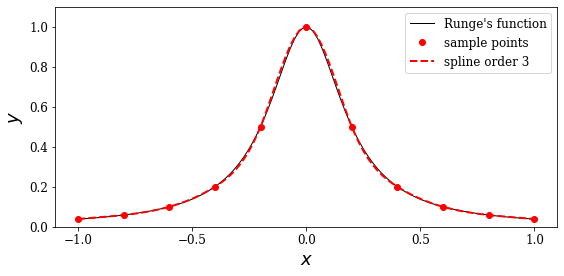

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f(xx), 'r--', lw=2, label='spline order 3')

ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig('ch7-spline-interpolation-runge.pdf');

In [45]:
# to illustrate order effects of a spline interpolation:

x = np.array([0, 1, 2,   3, 4, 5,   6,    7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

In [46]:
xx = np.linspace(x.min(), x.max(), 100)

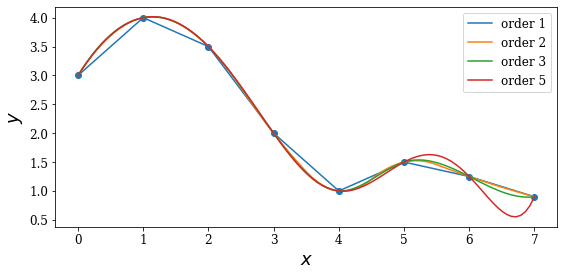

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig('ch7-spline-interpolation-orders.pdf');

# higher-order splines starting to diverge

### Multivariate interpolation
- useful functions: __interpolate.interp2d__ and __interpolate.griddata__.

In [48]:
x = y = np.linspace(-2, 2, 10)

In [49]:
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - .5)**2)

In [50]:
X, Y = np.meshgrid(x, y)

In [51]:
# simulate noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)

In [52]:
f_interp = interpolate.interp2d(x, y, Z, kind='cubic')

In [53]:
xx = yy = np.linspace(x.min(), x.max(), 100)

In [54]:
ZZi = f_interp(xx, yy)

In [55]:
XX, YY = np.meshgrid(xx, yy)

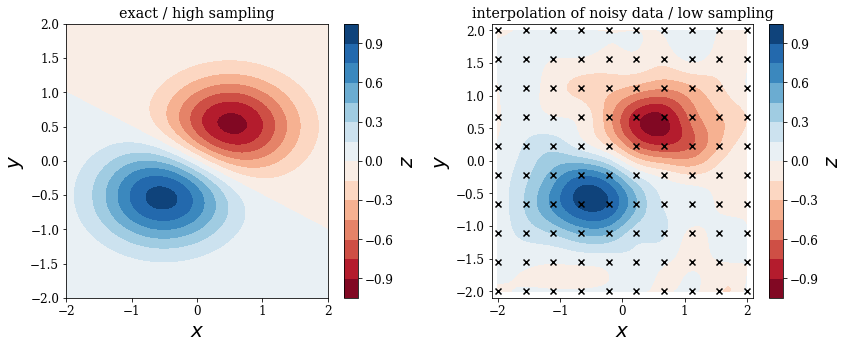

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
fig.savefig('ch7-multivariate-interpolation-regular-grid.pdf')

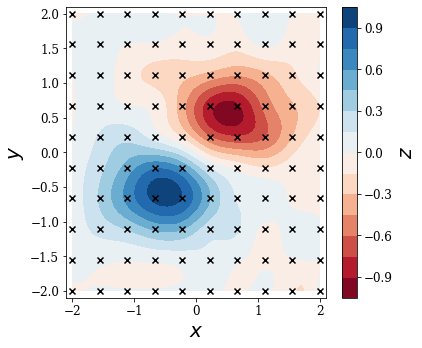

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

c = ax.contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker='x', color='k')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
#fig.savefig('ch7-multivariate-interpolation-regular-grid.pdf')

### Irregular grid

* common use case requiring multivariate interpolation: when sampled data comes from an irregular coordinate grid.
* SciPy's __interpolate.griddata__ function maps irregular data to a regular grid.
* It accepts 'nearest','linear','cubic' interpolation arguments.

In [58]:
np.random.seed(115925231)

In [59]:
x = y = np.linspace(-1, 1, 100)

In [60]:
X, Y = np.meshgrid(x, y)

In [61]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

In [62]:
Z = f(X, Y)

In [63]:
N = 500

In [64]:
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

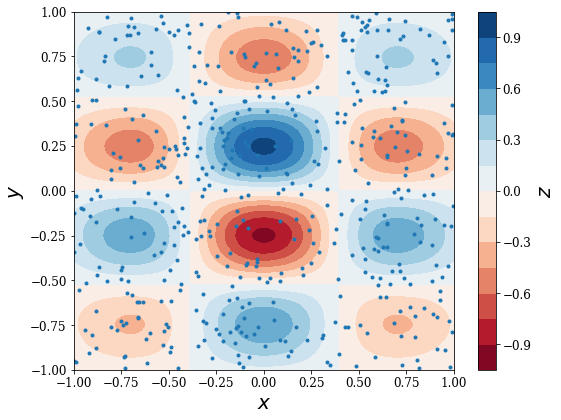

In [65]:
#contour plot, randomly sampled function (n=500)

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
fig.savefig('ch7-multivariate-interpolation-exact.pdf');

In [66]:
# helper function - interpolates data pts with three methods
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

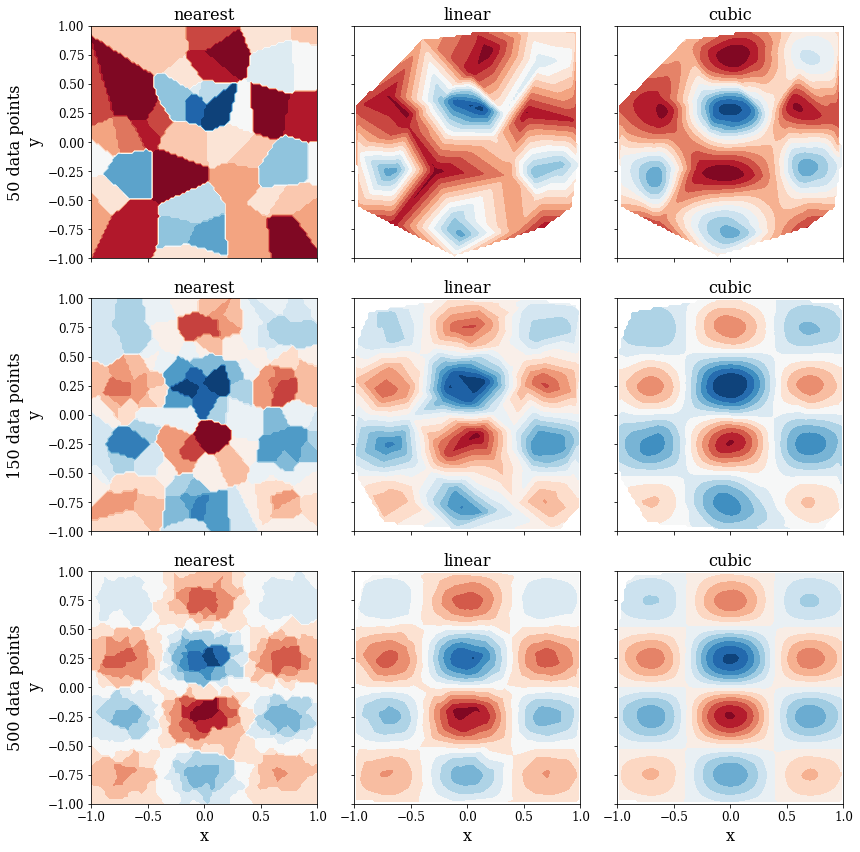

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)
    
fig.tight_layout()
fig.savefig('ch7-multivariate-interpolation-interp.pdf');